In [8]:
from torch.utils.data import Dataset
from collections import defaultdict
from random import choice
import torchvision
import numpy as np
import matplotlib.pyplot as plt

In [26]:
class MNISTMetricDataset(Dataset):
    def __init__(self, root="/tmp/mnist/", split='train'):
        super().__init__()
        assert split in ['train', 'test', 'traineval']
        self.root = root
        self.split = split
        mnist_ds = torchvision.datasets.MNIST(self.root, train='train' in split, download=True)
        self.images, self.targets = mnist_ds.data.float() / 255., mnist_ds.targets
        self.classes = list(range(10))

        self.target2indices = defaultdict(list)
        for i in range(len(self.images)):
            self.target2indices[self.targets[i].item()] += [i]

    def _sample_negative(self, index):
        # YOUR CODE HERE
        """
        returns index of a random negative example
        """
        target=self.targets[index].item()
        negative_indices=[]
        t2i=self.target2indices
        for key in t2i.keys():
            if key!=target:
                negative_indices.extend(t2i[key])
        return choice(negative_indices)


    def _sample_positive(self, index):
        # YOUR CODE HERE
        """
        returns index of a random positive example
        """
        target=self.targets[index].item()
        positive_indices=self.target2indices[target]
        return choice(positive_indices)


    def __getitem__(self, index):
        anchor = self.images[index].unsqueeze(0)
        target_id = self.targets[index].item()
        if self.split in ['traineval', 'val', 'test']:
            return anchor, target_id
        else:
            positive = self._sample_positive(index)
            negative = self._sample_negative(index)
            positive = self.images[positive]
            negative = self.images[negative]
            return anchor, positive.unsqueeze(0), negative.unsqueeze(0), target_id

In [27]:
mnist=MNISTMetricDataset()

In [42]:
imgs=mnist.images
tar=mnist.targets
cl=mnist.classes
t2i=mnist.target2indices

t2i_3=t2i[3]
trice=imgs[t2i_3]

t2i_ne_3=[]
print(t2i.keys())

dict_keys([5, 0, 4, 1, 9, 2, 3, 6, 7, 8])


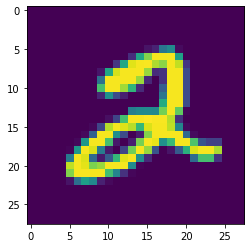

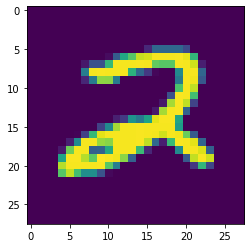

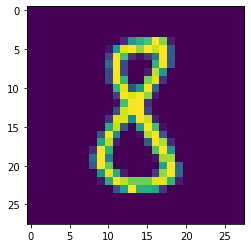

2


In [41]:
a,pos, neg, target=mnist[5]
plt.imshow(a.squeeze())
plt.show()
plt.imshow(pos.squeeze())
plt.show()
plt.imshow(neg.squeeze())
plt.show()
print(target)
